In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

# File path for the CSV file
output_csv_file = '/Users/ashwinkashyap/Downloads/output_dataset.csv'

nlevels = 8
scaleFactor = 1.2
EDGE_THRESHOLD = 19
PATCH_SIZE = 31
mvScaleFactor = [None] * nlevels

mvScaleFactor[0] = 1.0

for i in range(1, nlevels):
    mvScaleFactor[i]=mvScaleFactor[i-1]*scaleFactor

# create SIFT feature extractor
sift = cv2.SIFT_create()

#def compute_features_pp(filename, dnfname):
def compute_features_pp(filename):
    image = cv2.imread(filename)
    # Initialize mvImagePyramid
    mvImagePyramid = [None] * nlevels

    for level in range(0, nlevels):
        if level == 0:
            mvImagePyramid[0] = cv2.copyMakeBorder(image, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                                           cv2.BORDER_REFLECT_101)
        else:
            scale = scaleFactor ** level
            sz = (int(image.shape[1] / scale), int(image.shape[0] / scale))
            resized = cv2.resize(mvImagePyramid[level-1], sz, interpolation=cv2.INTER_LINEAR)
            mvImagePyramid[level] = cv2.copyMakeBorder(resized, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                                                   cv2.BORDER_REFLECT_101 + cv2.BORDER_ISOLATED)
            print(mvImagePyramid[level].shape)

        # detect features from the image
        keypoints, descriptors = sift.detectAndCompute(mvImagePyramid[level], None)


        for keypoint in keypoints:
            keypoint.octave = level
            keypoint.size = PATCH_SIZE*mvScaleFactor[level]
            keypoint.response = round(keypoint.response * 1000)
'''
            # Open the CSV file in write mode
            with open(output_csv_file, 'a', newline='') as file:
                # Create a CSV writer object
                writer = csv.writer(file)
                # Write the data to the CSV file
                row = [str(val) for val in [filename, round(keypoint.pt[0]), round(keypoint.pt[1]), keypoint.size, keypoint.angle, keypoint.response, keypoint.octave, keypoint.class_id]]
                writer.writerow(row)
'''

"""
# Specify the directory path
directory = "/Users/ashwinkashyap/Dissertation/Code/rgbd_dataset_freiburg1_floor/rgb"

# Iterate through the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      with open(filename, 'r') as file:
        line = file.read
    # Check if the file has an image extension
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        rgb_folder = rgb_directory+'/'+filename
        depth_folder = depth_directory+'/'+
        compute_features_pp(filename, dnfname)
print(f"Data has been written to '{output_csv_file}'.")
"""

compute_features_pp('d.pgm')
print('--------')
compute_features_pp('r.ppm')

(438, 571, 3)
(371, 482, 3)
(315, 408, 3)
(269, 346, 3)
(230, 295, 3)
(198, 252, 3)
(171, 216, 3)
--------
(438, 571, 3)
(371, 482, 3)
(315, 408, 3)
(269, 346, 3)
(230, 295, 3)
(198, 252, 3)
(171, 216, 3)


In [ ]:
with open('/cs/home/akhkr1/cuda-ubuntu/tum_dataset/tum_synched.txt')
for line in file:
        parts = line.strip().split(' ')
        rgb_filename = parts[1]
        depth_filename = parts[2]
        print("RGB filename:", rgb_filename)
        print("Depth filename:", depth_filename)

In [ ]:
import cv2

image = cv2.imread('d.pgm')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image)
print(image[0,2])

[[194 194 195 ... 255 255 255]
 [194 194 195 ... 255 255 255]
 [194 194 195 ... 255 255 255]
 ...
 [162 162 163 ... 255 255 255]
 [162 163 163 ... 255 255 255]
 [162 163 163 ... 255 255 255]]
195


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


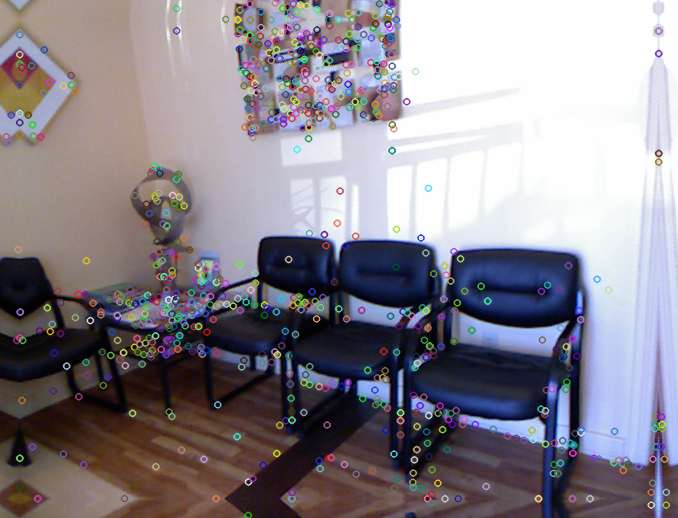

939
(438, 571, 3)
torch.Size([256, 1024])


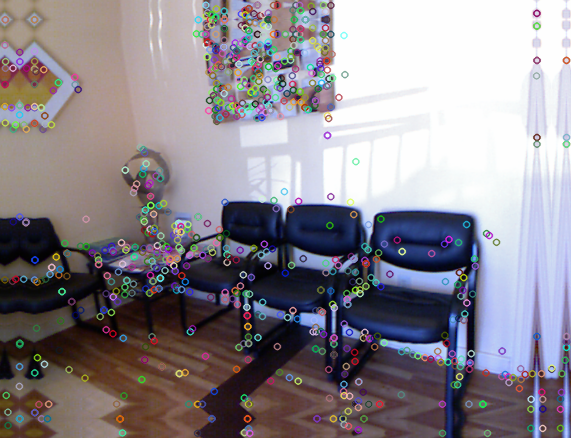

924
(371, 482, 3)
torch.Size([256, 1024])


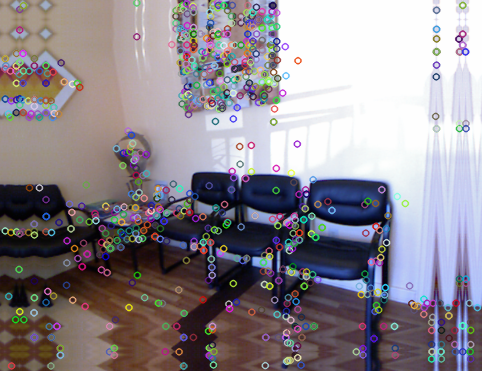

931
(315, 408, 3)
torch.Size([256, 1024])


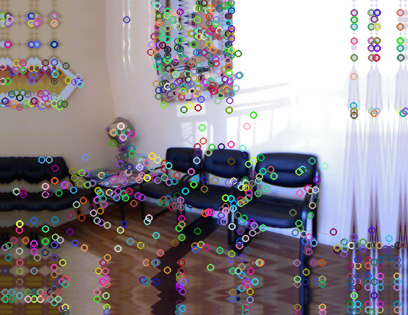

939
(269, 346, 3)
torch.Size([256, 1024])


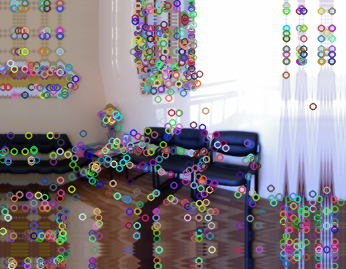

908
(230, 295, 3)
torch.Size([256, 1024])


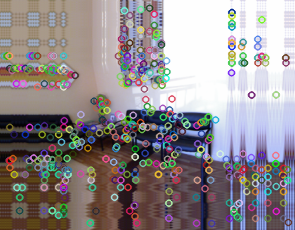

557
(198, 252, 3)
torch.Size([256, 1024])


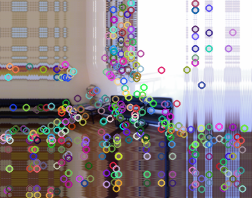

427
(171, 216, 3)
torch.Size([256, 1024])


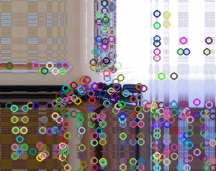

388


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv
from google.colab.patches import cv2_imshow
from PIL import Image
import torch
import torchvision.transforms as T


dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')

# Load and preprocess the input image
transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5]),
])
# File path for the CSV file
output_csv_file = '/Users/ashwinkashyap/Downloads/output_dataset.csv'

nlevels = 8
scaleFactor = 1.2
EDGE_THRESHOLD = 19
PATCH_SIZE = 31
mvScaleFactor = [None] * nlevels

mvScaleFactor[0] = 1.0

for i in range(1, nlevels):
    mvScaleFactor[i]=mvScaleFactor[i-1]*scaleFactor

# create SIFT feature extractor
sift = cv2.SIFT_create()

#def compute_features_pp(filename, dnfname):
def compute_features_pp(filename):
    image = cv2.imread(filename)
    # Initialize mvImagePyramid
    mvImagePyramid = [None] * nlevels

    for level in range(0, nlevels):
        if level == 0:
          mvImagePyramid[0] = cv2.copyMakeBorder(image, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                                           cv2.BORDER_REFLECT_101)
        else:
            scale = scaleFactor ** level
            sz = (int(image.shape[1] / scale), int(image.shape[0] / scale))
            resized = cv2.resize(mvImagePyramid[level-1], sz, interpolation=cv2.INTER_LINEAR)
            mvImagePyramid[level] = cv2.copyMakeBorder(resized, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                                                   cv2.BORDER_REFLECT_101 + cv2.BORDER_ISOLATED)
            print(mvImagePyramid[level].shape)
            temp = Image.fromarray(mvImagePyramid[level])
            temp = transform(temp).unsqueeze(0)
            with torch.no_grad():
              features = dinov2_vitl14.forward_features(temp)["x_norm_patchtokens"]
              features = features.squeeze(0)
              print(features.shape)
        # detect features from the image
        keypoints, descriptors = sift.detectAndCompute(mvImagePyramid[level], None)
        sift_image = cv2.drawKeypoints(mvImagePyramid[level], keypoints, outImage=None)
        cv2_imshow(sift_image)
        print(len(keypoints))


    for keypoint in keypoints:
        #keypoint.octave = level
         keypoint.size = PATCH_SIZE*mvScaleFactor[0]
         keypoint.response = round(keypoint.response * 1000)


'''
            # Open the CSV file in write mode
            with open(output_csv_file, 'a', newline='') as file:
                # Create a CSV writer object
                writer = csv.writer(file)
                # Write the data to the CSV file
                row = [str(val) for val in [filename, round(keypoint.pt[0]), round(keypoint.pt[1]), keypoint.size, keypoint.angle, keypoint.response, keypoint.octave, keypoint.class_id]]
                writer.writerow(row)
'''

"""
# Specify the directory path
directory = "/Users/ashwinkashyap/Dissertation/Code/rgbd_dataset_freiburg1_floor/rgb"

# Iterate through the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      with open(filename, 'r') as file:
        line = file.read
    # Check if the file has an image extension
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        rgb_folder = rgb_directory+'/'+filename
        depth_folder = depth_directory+'/'+
        compute_features_pp(filename, dnfname)
print(f"Data has been written to '{output_csv_file}'.")
"""

compute_features_pp('r.ppm')